<a href="https://colab.research.google.com/github/willyan041107/DS1002/blob/main/Assignments/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [59]:
import pandas as pd

---

In [ ]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [60]:
my_list = [98, 24, 46, 87, 33]
series = pd.Series(my_list)

3. Take the above series and add an index that starts at 2 and steps by 3

In [61]:
series.index = range(2, 2 + len(series)*3, 3)

4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [62]:
data = {
    'Name': ['Nelson', 'John', 'Charlie', 'Chris'],
    'Age': [25, 30, 35, 40],
    'Career': ['Engineer', 'Doctor', 'Artist', 'Lawyer']
}
df = pd.DataFrame(data)
print(df)

      Name  Age    Career
0   Nelson   25  Engineer
1     John   30    Doctor
2  Charlie   35    Artist
3    Chris   40    Lawyer


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [63]:
df.index.name = 'participant_id'
print(df)

                   Name  Age    Career
participant_id                        
0                Nelson   25  Engineer
1                  John   30    Doctor
2               Charlie   35    Artist
3                 Chris   40    Lawyer


6. Use a pandas function to determine the data types of the columns of `df`.


In [64]:
df.dtypes

Name      object
Age        int64
Career    object
dtype: object

7. Using bracket notation, reference column `name`

In [65]:
df['Name']

participant_id
0     Nelson
1       John
2    Charlie
3      Chris
Name: Name, dtype: object

8. Using dot notation, reference column `name`

In [67]:
df.Name

participant_id
0     Nelson
1       John
2    Charlie
3      Chris
Name: Name, dtype: object



8. Reference column `name` and have it returned in a dataframe.

In [68]:
df[['Name']]

,Name
participant_id,
0,Nelson
1,John
2,Charlie
3,Chris


9. Show the 3rd element in column `career`.

In [69]:
df['Career'][2]

'Artist'

10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [70]:
import seaborn as sns
iris = sns.load_dataset('iris')

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [71]:
print(iris[['sepal_length', 'sepal_width']].corr())

              sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [72]:
correlations = iris.groupby('species')[['sepal_length', 'sepal_width']].corr().iloc[0::2, -1]
print(correlations.idxmax(), correlations.max())

('setosa', 'sepal_length') 0.7425466856651594


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.


In [73]:
for species in iris['species'].unique():
    print(f"{species}:")
    print(iris[iris['species'] == species].drop('species', axis=1).corr().unstack().sort_values().head(1))

setosa:
sepal_width  petal_length    0.1777
dtype: float64
versicolor:
sepal_length  sepal_width    0.525911
dtype: float64
virginica:
sepal_length  petal_width    0.281108
dtype: float64


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


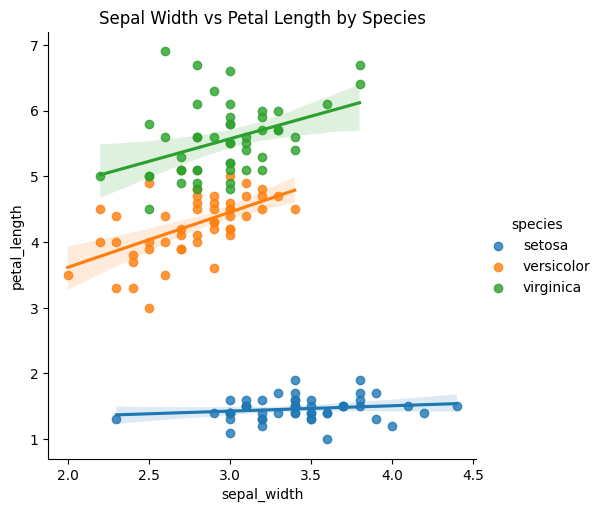

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='sepal_width', y='petal_length', hue='species', data=iris)
plt.title('Sepal Width vs Petal Length by Species')
plt.show()

This phenomenon can be explained by Simpson's paradox, where a trend appears in several different groups of data but disappears or reverses when these groups are combined.